In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

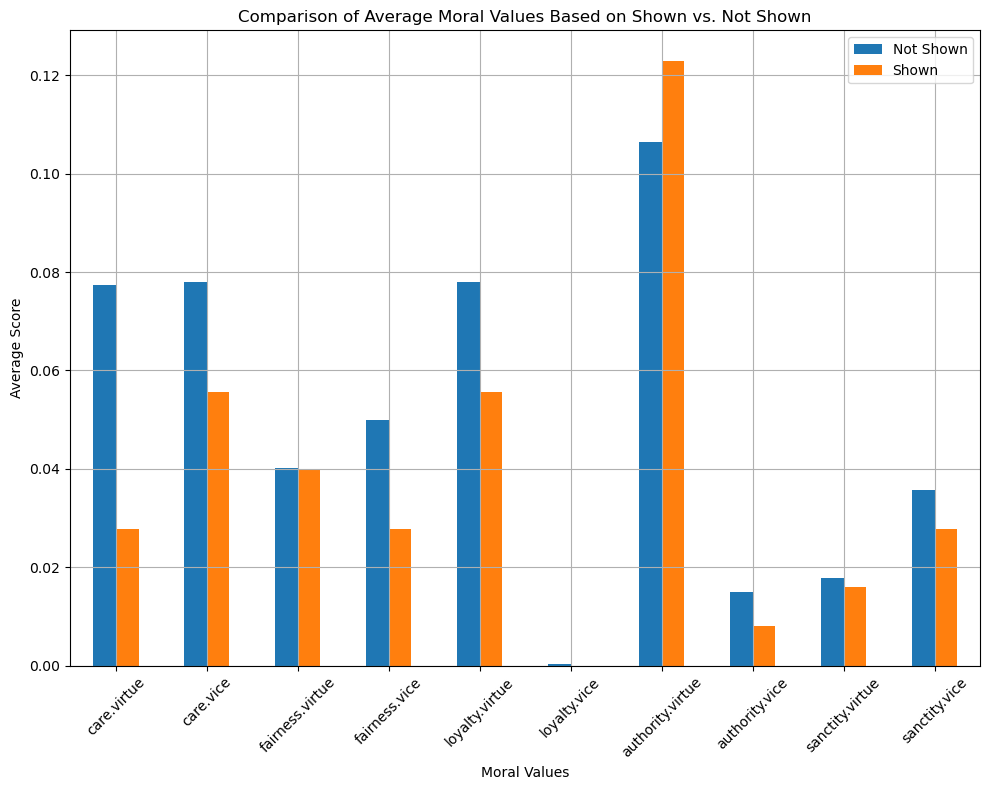

In [2]:
# Load the CSV file
file_path = '/Users/andrew/Desktop/community_notes_3/Notes Result/ns_m.csv'  # Make sure to update this with the actual file path
data = pd.read_csv(file_path)

# List of moral values to analyze
moral_values = [
    'care.virtue', 'care.vice', 'fairness.virtue', 'fairness.vice',
    'loyalty.virtue', 'loyalty.vice', 'authority.virtue', 'authority.vice',
    'sanctity.virtue', 'sanctity.vice'
]

# Group by the 'shown' column and calculate the mean for each moral value
avg_moral_values = data.groupby('shown')[moral_values].mean()

# Transpose the result for easier plotting
avg_moral_values = avg_moral_values.T
avg_moral_values.columns = ['Not Shown', 'Shown']

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 8))
avg_moral_values.plot(kind='bar', ax=ax)
ax.set_title('Comparison of Average Moral Values Based on Shown vs. Not Shown')
ax.set_ylabel('Average Score')
ax.set_xlabel('Moral Values')
ax.grid(True)
plt.xticks(rotation=45)  # Rotate labels to fit them better
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [4]:
# Perform t-tests and print results
print("Results of t-tests for moral values (Shown vs. Not Shown):")
for moral in moral_values:
    group1 = data[data['shown'] == True][moral]
    group2 = data[data['shown'] == False][moral]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # assuming unequal variance
    significance = "Yes" if p_val < 0.05 else "No"
    print(f"{moral}: p-value = {p_val:.6f} ({significance})")


Results of t-tests for moral values (Shown vs. Not Shown):
care.virtue: p-value = 0.000016 (Yes)
care.vice: p-value = 0.140691 (No)
fairness.virtue: p-value = 0.974544 (No)
fairness.vice: p-value = 0.043411 (Yes)
loyalty.virtue: p-value = 0.189527 (No)
loyalty.vice: p-value = 0.317365 (No)
authority.virtue: p-value = 0.576806 (No)
authority.vice: p-value = 0.232064 (No)
sanctity.virtue: p-value = 0.822075 (No)
sanctity.vice: p-value = 0.519671 (No)


In [5]:
# Perform t-tests and print results with Bonferroni correction
print("Results of t-tests for moral values (Shown vs. Not Shown) with Bonferroni Correction:")

# Determine the number of tests, which is the number of moral values
num_tests = len(moral_values)

# Adjust the significance level using Bonferroni correction
corrected_alpha = 0.05 / num_tests

for moral in moral_values:
    group1 = data[data['shown'] == True][moral]
    group2 = data[data['shown'] == False][moral]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # assuming unequal variance
    # Update significance checking against corrected alpha
    significance = "Yes" if p_val < corrected_alpha else "No"
    print(f"{moral}: p-value = {p_val:.6f} ({significance})")


Results of t-tests for moral values (Shown vs. Not Shown) with Bonferroni Correction:
care.virtue: p-value = 0.000016 (Yes)
care.vice: p-value = 0.140691 (No)
fairness.virtue: p-value = 0.974544 (No)
fairness.vice: p-value = 0.043411 (No)
loyalty.virtue: p-value = 0.189527 (No)
loyalty.vice: p-value = 0.317365 (No)
authority.virtue: p-value = 0.576806 (No)
authority.vice: p-value = 0.232064 (No)
sanctity.virtue: p-value = 0.822075 (No)
sanctity.vice: p-value = 0.519671 (No)


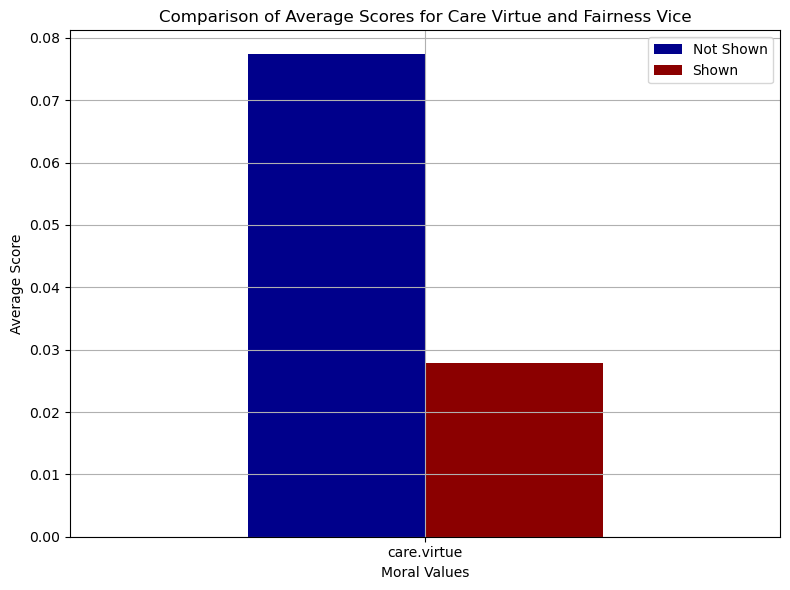

In [6]:
# Filter data to include only 'care.virtue' and 'fairness.vice'
moral_values = ['care.virtue']

# Group by the 'shown' column and calculate the mean for these specific moral values
avg_moral_values = data.groupby('shown')[moral_values].mean()

# Transpose the result for easier plotting
avg_moral_values = avg_moral_values.T
avg_moral_values.columns = ['Not Shown', 'Shown']

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
avg_moral_values.plot(kind='bar', ax=ax, color=['darkblue', 'darkred'])
ax.set_title('Comparison of Average Scores for Care Virtue and Fairness Vice')
ax.set_ylabel('Average Score')
ax.set_xlabel('Moral Values')
ax.grid(True)
plt.xticks(rotation=0)  # Rotate labels to fit them better
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()
